In [3]:
import numpy as np
import pandas as pd

data = pd.read_csv('data.csv').iloc[:, 1:-1]

# 将其中的0替换为nan
data = data.replace(0, np.nan)
print(data)
data.to_csv('data1.csv', index=False)

       cell_1    cell_2    cell_3    cell_4    cell_5    cell_6    cell_7  \
0    1.834012  1.845058  1.840036  1.836350  1.827606  1.832208  1.835826   
1    1.832187  1.841998  1.837241  1.834530  1.825446  1.830601  1.833951   
2    1.830368  1.838971  1.834470  1.832719  1.823300  1.828998  1.832081   
3    1.828554  1.835977  1.831725  1.830917  1.821169  1.827399  1.830217   
4    1.826746  1.833018  1.829007  1.829125  1.819053  1.825805  1.828359   
..        ...       ...       ...       ...       ...       ...       ...   
364       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
365       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
366       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
367       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
368       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

       cell_8    cell_9   cell_10  ...   cell_38   cell_39   cell_40  \
0  

47
<class 'numpy.ndarray'>
(369,) (342,)


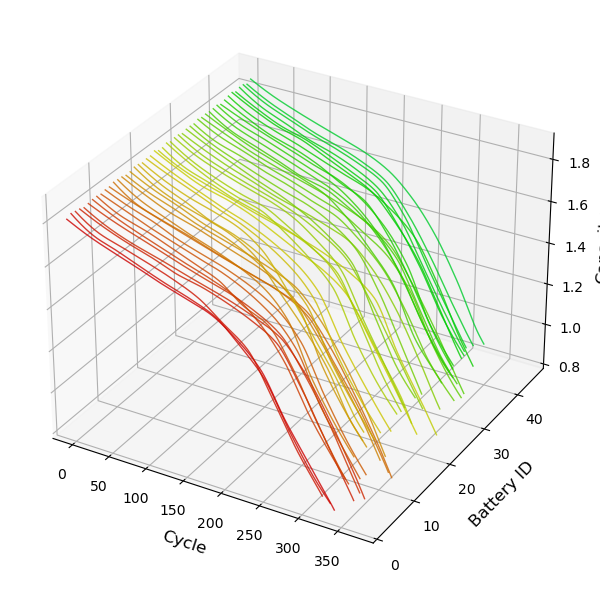

In [2]:
""" 绘制三维图 """
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import colorsys


font1 = FontProperties(fname="font/simhei.ttf", size=12)


def plot_3D(capacity, zlabel, fig_size, file_name, elev=12., azim=-135, line_width=1):
  fig = plt.figure(figsize=fig_size)
  ax = fig.add_subplot(projection='3d')
  plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0,wspace=0)
  # fig, ax = plt.subplots(figsize=fig_size,subplot_kw=dict(projection='3d'))

  # colors = ['#84D8EE', '#9D9AEE', 'grey', '#989898', 'orange', '#FFD774']
  # color_base = '#84D8EE'

  num_colors = 124  # 定义彩虹颜色的数量
  # rainbow_colors = [colorsys.hsv_to_rgb(i / num_colors, 1, 1) for i in range(num_colors)] # 生成彩虹颜色
  rainbow_colors = [colorsys.hsv_to_rgb(i / num_colors, 1, 0.8) for i in range(num_colors)] # 生成彩虹颜色


  for i in range(len(capacity)):
    ax.plot(range(len(capacity[i])), capacity[i], zs=i, zdir='y', linewidth=line_width, alpha=0.8, c=rainbow_colors[i])
    # ax.plot(data_x[i], data_z[i], zs=i, zdir='y', c=colors[i], linewidth=line_width, alpha=alpha)
    # ax.scatter(range(len(capacity[i])), capacity[i], zs=i, zdir='y', alpha=0.8, s=1)   # c='red'

  ax.set_xlabel('Cycle', labelpad=6, fontsize=12)   # fontproperties=font1
  ax.set_ylabel('Battery ID', labelpad=6, fontsize=12)
  ax.set_zlabel('Capacity', labelpad=4, fontsize=12) #, labelpad=20
  ax.set_zlim(0.8, 1.9)   # OCV-SOC
  # ax.set_xlim(2.9, 4.1)
  ax.set_ylim(0, len(capacity))
  # ax.view_init(elev=elev, azim=azim)
  ax.ticklabel_format(style='sci', axis='z', scilimits=(0, 0))

  # ax.view_init(elev=12., azim=-135)
  # plt.subplots_adjust(top=0.01, bottom=0.001, right=0.01, left=0.001, hspace=0, wspace=0)
  plt.subplots_adjust(left=0.1, right=1, top=0.7, bottom=0.1)
  # plt.margins(1, 1, 1)
  fig.tight_layout()  # 全局整理图片尺寸

  # plt.xlabel('Voltage(V)', fontproperties=font2, labelpad=6, fontsize=fontsize)
  # plt.ylabel('Cycle', fontproperties=font2, labelpad=6, fontsize=fontsize)
  # plt.zlabel(zlabel, fontproperties=font2, labelpad=6, fontsize=fontsize) #, labelpad=20

  # plt.savefig('figure/' + file_name, bbox_inches='tight', transparent=True, dpi=300)    # tight_layout=True
  plt.show()


# 读取数据并去除空值
data4fig = []
data = pd.read_csv('data.csv', header=0)
for i in range(data.shape[1]):
  data_temp = data.iloc[:,i].values
  data4fig.append(data_temp[~np.isnan(data_temp)])
print(len(data4fig))
print(type(data4fig[0]))
print(data.iloc[:,0].shape, data4fig[0].shape)

# 绘制图像
plot_3D(data4fig, 'Capacity', (7, 6), 'data4fig.png', elev=12., azim=-135, line_width=1)

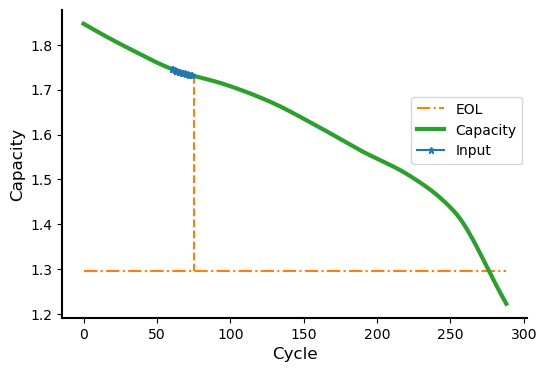

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv', header=0)
data.head()

capacity = data.iloc[:,21].values[:-80]
EOL = 1.85*0.7
EOL_list = np.ones_like(capacity) * EOL

# input
s = 60
e = s + 15
x_input = np.arange(s, e)

# vertical
x = e
y_top, y_bottom = capacity[e], EOL

# plt.figure(figsize=(6, 4))
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(EOL_list, linestyle='-.', c='#ff7f0e', label='EOL')
ax.plot([x, x], [y_top, y_bottom], linestyle='--', c='#ff7f0e')
ax.plot(capacity, linewidth=3, c='#2ca02c', label='Capacity')
ax.plot(x_input, capacity[s:e], marker='*', markersize=5,
        c='#1f77b4', label='Input')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')


# ax.arrow(0, 0, 0, 0.9, head_width=0.03, head_length=0.05, fc='black', ec='black')
# ax.arrow(0, 0, 0.9, 0, head_width=0.03, head_length=0.05, fc='black', ec='black')


plt.xlabel('Cycle', fontsize=12)
plt.ylabel('Capacity', fontsize=12)
plt.legend(loc=(0.75, 0.5))
plt.savefig('direct_predict.png', bbox_inches='tight', transparent=True, dpi=300)


In [6]:
X = np.linspace(-5, 5, 50)
Y = np.linspace(-20, -15, 50)
print(X.shape, Y.shape)
print(X)
X, Y = np.meshgrid(X, Y)
print(X)
print(X.shape, Y.shape)

(50,) (50,)
[-5.         -4.79591837 -4.59183673 -4.3877551  -4.18367347 -3.97959184
 -3.7755102  -3.57142857 -3.36734694 -3.16326531 -2.95918367 -2.75510204
 -2.55102041 -2.34693878 -2.14285714 -1.93877551 -1.73469388 -1.53061224
 -1.32653061 -1.12244898 -0.91836735 -0.71428571 -0.51020408 -0.30612245
 -0.10204082  0.10204082  0.30612245  0.51020408  0.71428571  0.91836735
  1.12244898  1.32653061  1.53061224  1.73469388  1.93877551  2.14285714
  2.34693878  2.55102041  2.75510204  2.95918367  3.16326531  3.36734694
  3.57142857  3.7755102   3.97959184  4.18367347  4.3877551   4.59183673
  4.79591837  5.        ]
[[-5.         -4.79591837 -4.59183673 ...  4.59183673  4.79591837
   5.        ]
 [-5.         -4.79591837 -4.59183673 ...  4.59183673  4.79591837
   5.        ]
 [-5.         -4.79591837 -4.59183673 ...  4.59183673  4.79591837
   5.        ]
 ...
 [-5.         -4.79591837 -4.59183673 ...  4.59183673  4.79591837
   5.        ]
 [-5.         -4.79591837 -4.59183673 ...  4.5918

In [51]:
print(1.85*0.7)

1.295
